# Using Gradient Boosting to Build a Regression Model

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# read data into iterable
x_list = []
labels = []
names = []
first_line = True
data_path = './data/winequality-red.csv'

with open(data_path) as data:
    
    for line in data:
        
        if first_line:
            names = line.strip().split(';')
            first_line = False
            
        else:
            # split on semicolon
            row = line.strip().split(';')
            
            # put labels in separate array
            labels.append(float(row[-1]))
            
            # remove label from row
            row.pop()
            
            # convert row to floats
            float_row = [float(num) for num in row]
            x_list.append(float_row)
            
n_rows = len(x_list)
n_cols = len(x_list[0])

In [14]:
x = np.array(x_list)
y = np.array(labels)
wine_names = np.array(names)

# take fixed holdout set 30% of data rows
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=531)

# Train Gradient Boosting model to minimize mean squared error
n_est = 2000
depth = 7
learn_rate = 0.01
sub_samp = 0.5

wine_gbm_model = ensemble.GradientBoostingRegressor(n_estimators=n_est, max_depth=depth, learning_rate=learn_rate,
                                                   subsample=sub_samp, loss='ls')
wine_gbm_model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=2000, presort='auto', random_state=None,
             subsample=0.5, verbose=0, warm_start=False)

In [15]:
# compute mse on test set
ms_error = []
predictions = wine_gbm_model.staged_predict(x_test)

for p in predictions:
    ms_error.append(mean_squared_error(y_test, p))
    
print(f'MSE: {min(ms_error)}, {ms_error.index(min(ms_error))}')

MSE: 0.31299984168001793, 868


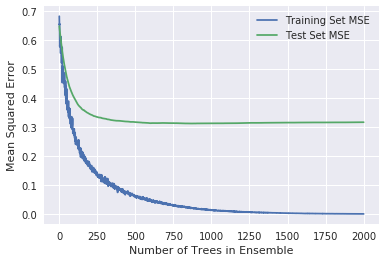

In [16]:
# plot training and test errors vs number of trees in ensemble
plt.figure()
plt.plot(range(1, n_est + 1), wine_gbm_model.train_score_, label='Training Set MSE')
plt.plot(range(1, n_est + 1), ms_error, label='Test Set MSE')
plt.legend(loc='upper right')
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Mean Squared Error')
plt.show()

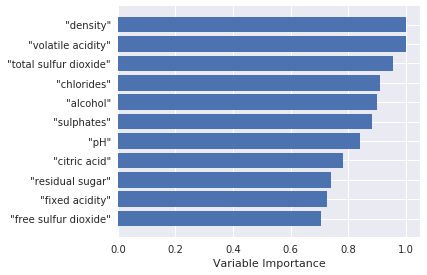

In [17]:
# Plot feature importance
feature_importance = wine_gbm_model.feature_importances_

# normalize by max importance
feature_importance = feature_importance / feature_importance.max()
idx_sorted = np.argsort(feature_importance)
bar_pos = np.arange(idx_sorted.shape[0]) + .5
plt.barh(bar_pos, feature_importance[idx_sorted], align='center')
plt.yticks(bar_pos, wine_names[idx_sorted])
plt.xlabel('Variable Importance')
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plt.show()